In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Первый взгляд на данные

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.info()
print('-' * 100)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
# пропуски есть
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [10]:
# дубликатов нет
df_train.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

# 2. EDA и первичная обработка данных

In [12]:
# сразу удалим признак Id (он совпадает с индексом)
df_train = df_train.drop(columns='Id')
df_test = df_test.drop(columns='Id')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


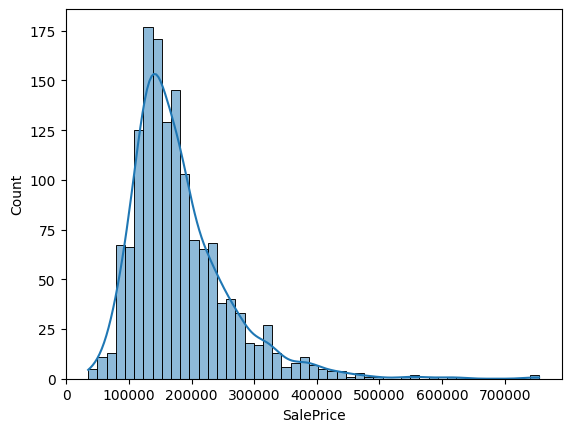

In [13]:
# посмотрим на распределение целевой переменной
# распределение похоже на нормальное
sns.histplot(df_train['SalePrice'], kde=True);

In [14]:
# оценим корреляцию между числовыми признаками
df_train.corr(numeric_only=True)[(df_train.corr(numeric_only=True).abs() > 0.6)]
# некоторые признаки сильно коррелируют между собой по понятным причинам

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_train.corr(numeric_only=True)['SalePrice'][df_train.corr(numeric_only=True)['SalePrice'].abs() > 0.6]
# целевая переменная имеет сущ. корреляцию со следующими признаками

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

**2.1 Категориальные признаки**

In [16]:
# выберем категориальные признаки - 43 всего
df_train_cat = df_train.select_dtypes(include='object')
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

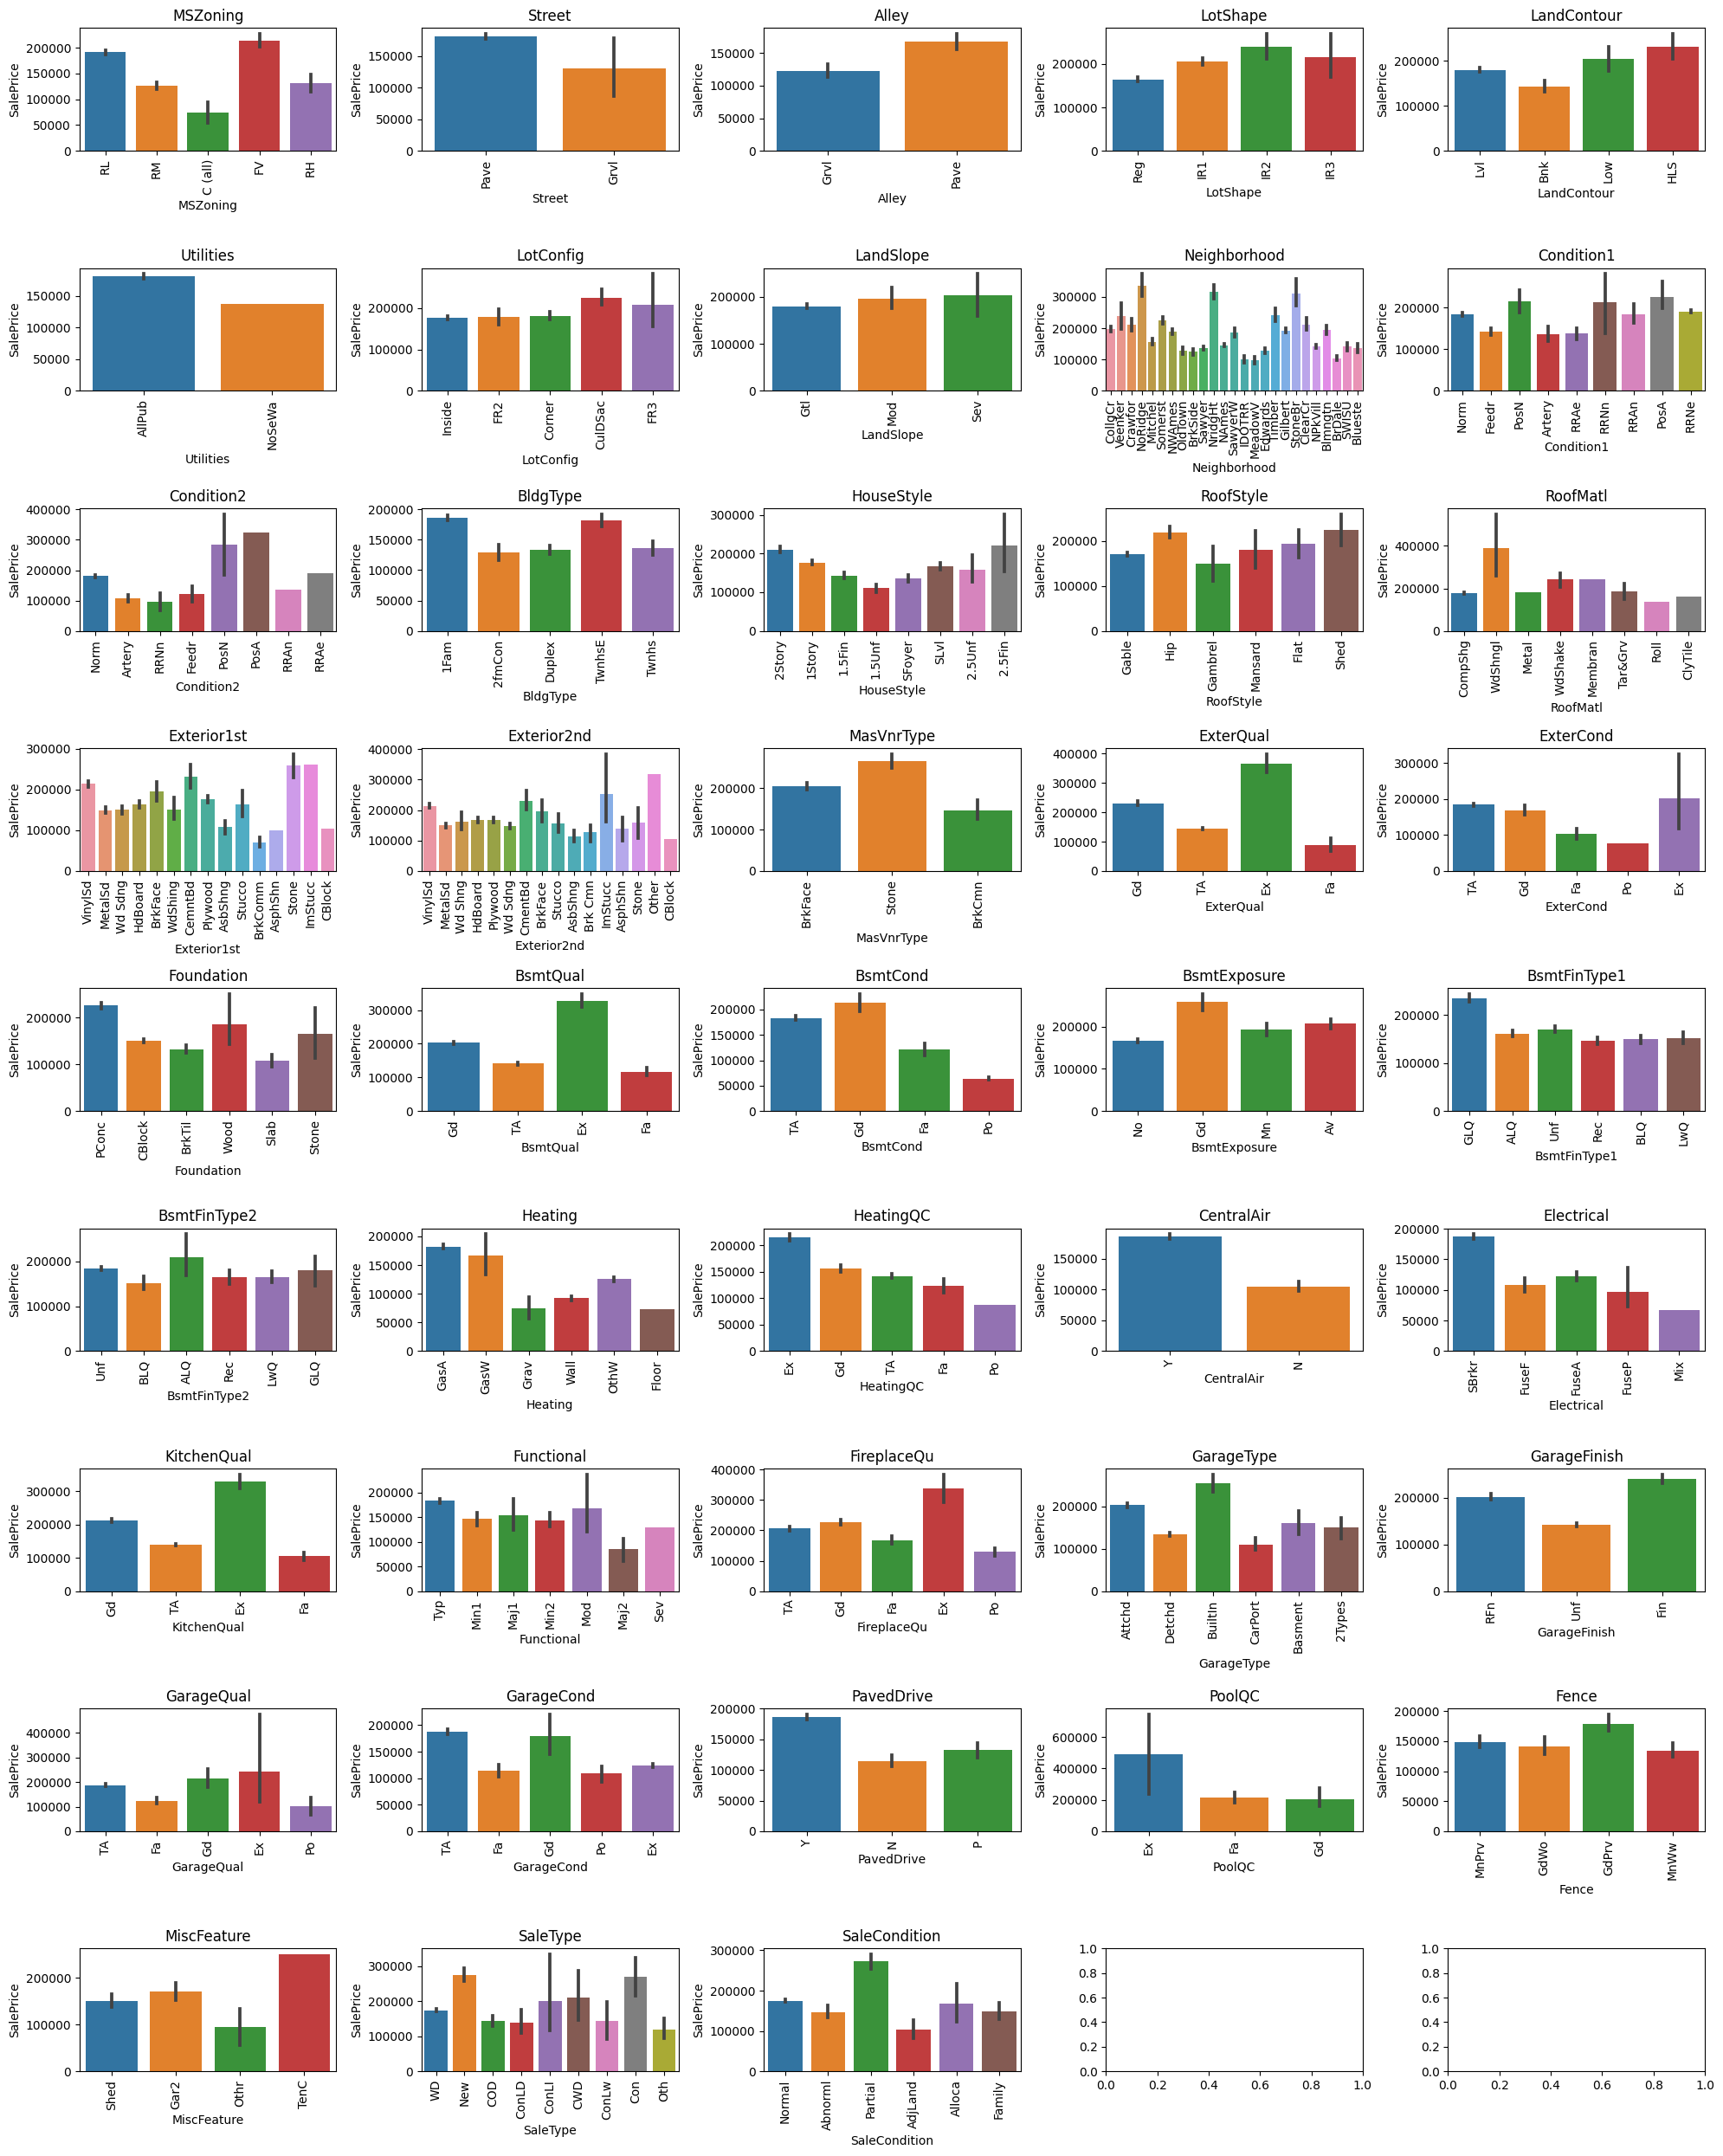

In [17]:
# добавим целевую переменную для построения графиков
df_train_cat_target = df_train_cat.join(df_train['SalePrice'])

def cat_features_vis(X):
    fig, ax = plt.subplots(9, 5, figsize=(20, 25))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='SalePrice').columns):
        g = sns.barplot(x=X[col], y=X['SalePrice'], ax=ax[i], estimator='mean');
        g.set_xticklabels(g.get_xticklabels(), rotation=90) # поворот меток оси для массива ax
        ax[i].set_title(col)

    plt.tight_layout()


cat_features_vis(df_train_cat_target)

In [18]:
# найдем процент отсутствующих данных для каждого категориального признака
srs = df_train_cat.isnull().sum() / len(df_train_cat)
srs

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [19]:
# получим список признаков с пропусками
srs[srs > 0].index.tolist()

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

В документации к датасету указано, что для признаков ниже (у которых есть пропуски) значение NA (либо None) означает отсутствие данной характеристики дома:

Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

Т.е. у всех этих признаков NA можно заменить на 0 или другое схожее по смыслу значение.

Единственным признаком, где не указано про NA, остался Electrical - заполним пропуски там модой (пропусков там почти нет)

In [20]:
df_train_cat['Electrical'] = df_train_cat['Electrical'].fillna(df_train_cat['Electrical'].mode()[0])
df_train_cat = df_train_cat.fillna('0') # заполняем значением '0', чтобы оценить, как изменятся графики
df_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal


In [21]:
# все пропуски заполнены
df_train_cat.isnull().sum() / len(df_train_cat)

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

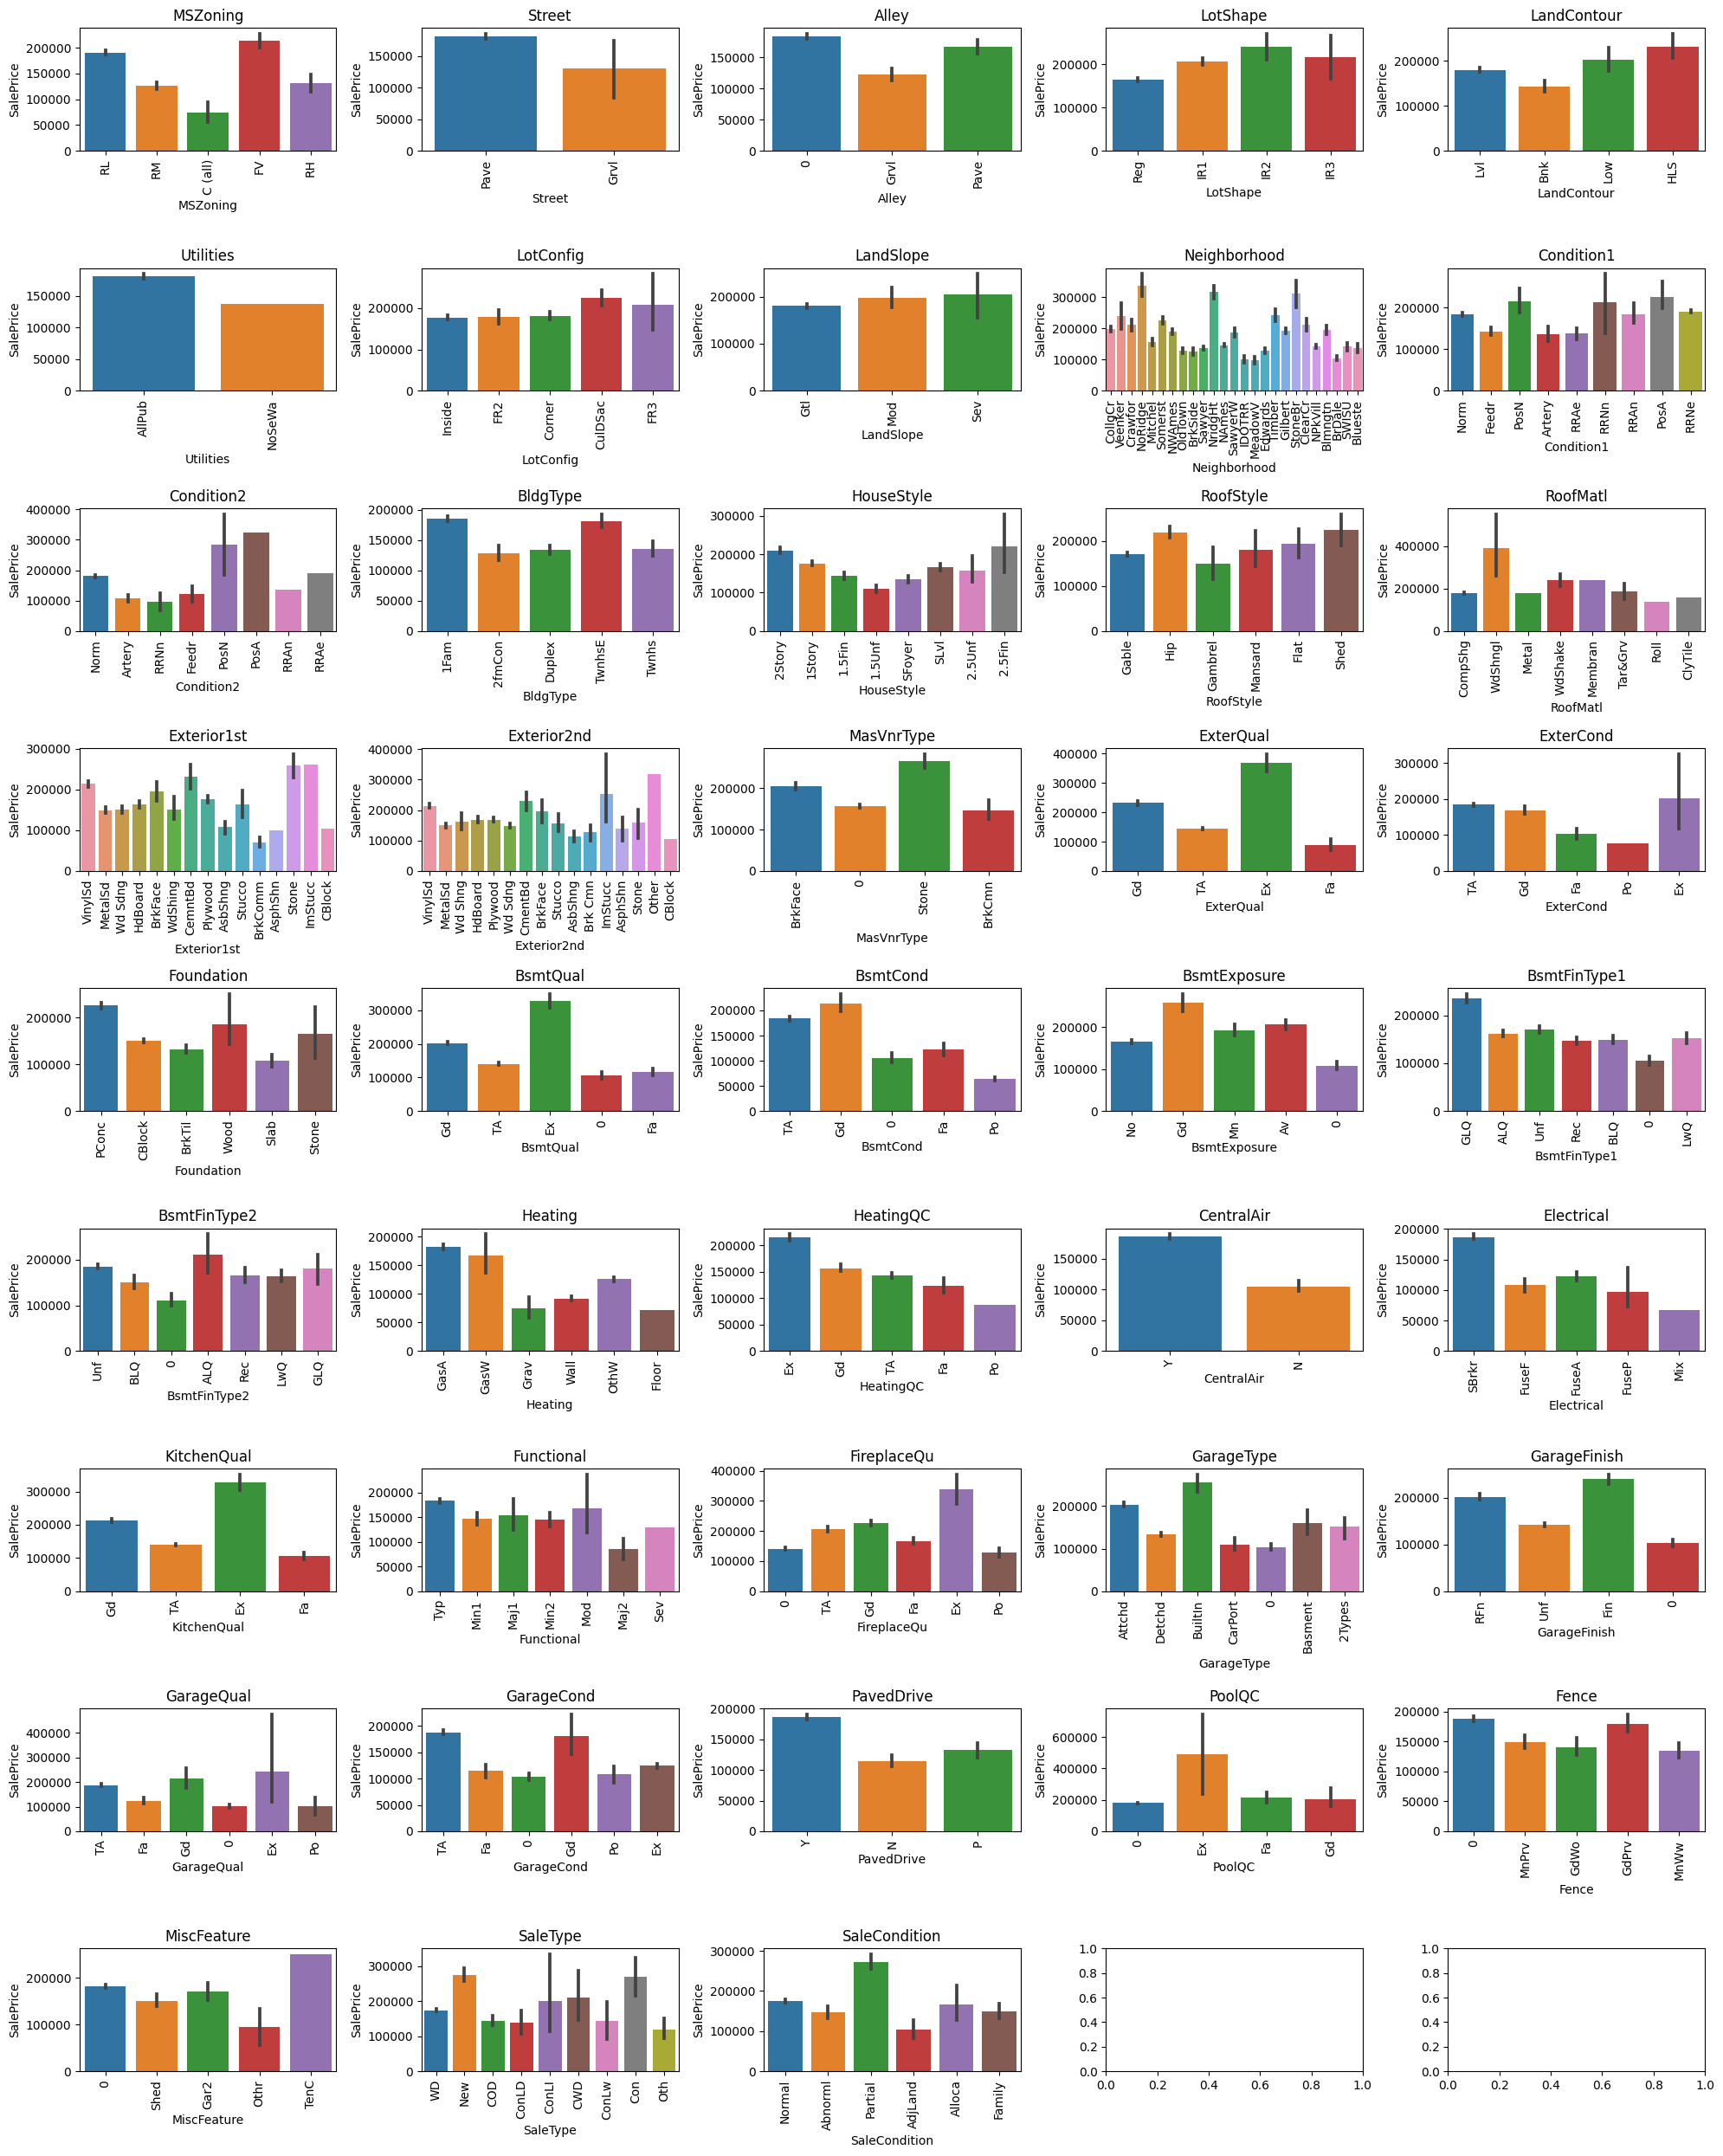

In [22]:
# посмотрим теперь на графики
df_train_cat_target = df_train_cat.join(df_train['SalePrice'])
cat_features_vis(df_train_cat_target)

Попробуем взять большое количество признаков, при этом следует избегать возможной мультиколлинеарности (т.е. вряд ли стоит использовать одновременно ExterQual и ExterCond)

In [23]:
# на основании графиков выберем признаки, которые существенно влияют на целевую переменную
cat_features = ['MSZoning','Street','Alley','Utilities','Neighborhood','Condition1','Condition2','HouseStyle',
'Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtCond',
'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
'GarageFinish','PoolQC','MiscFeature','SaleType','SaleCondition']

**2.2 Количественные признаки**

In [24]:
# выберем количественные признаки - 37 всего (с учетом целевой переменной, Id ранее удалили)
df_train_num = df_train.select_dtypes(include='number')
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

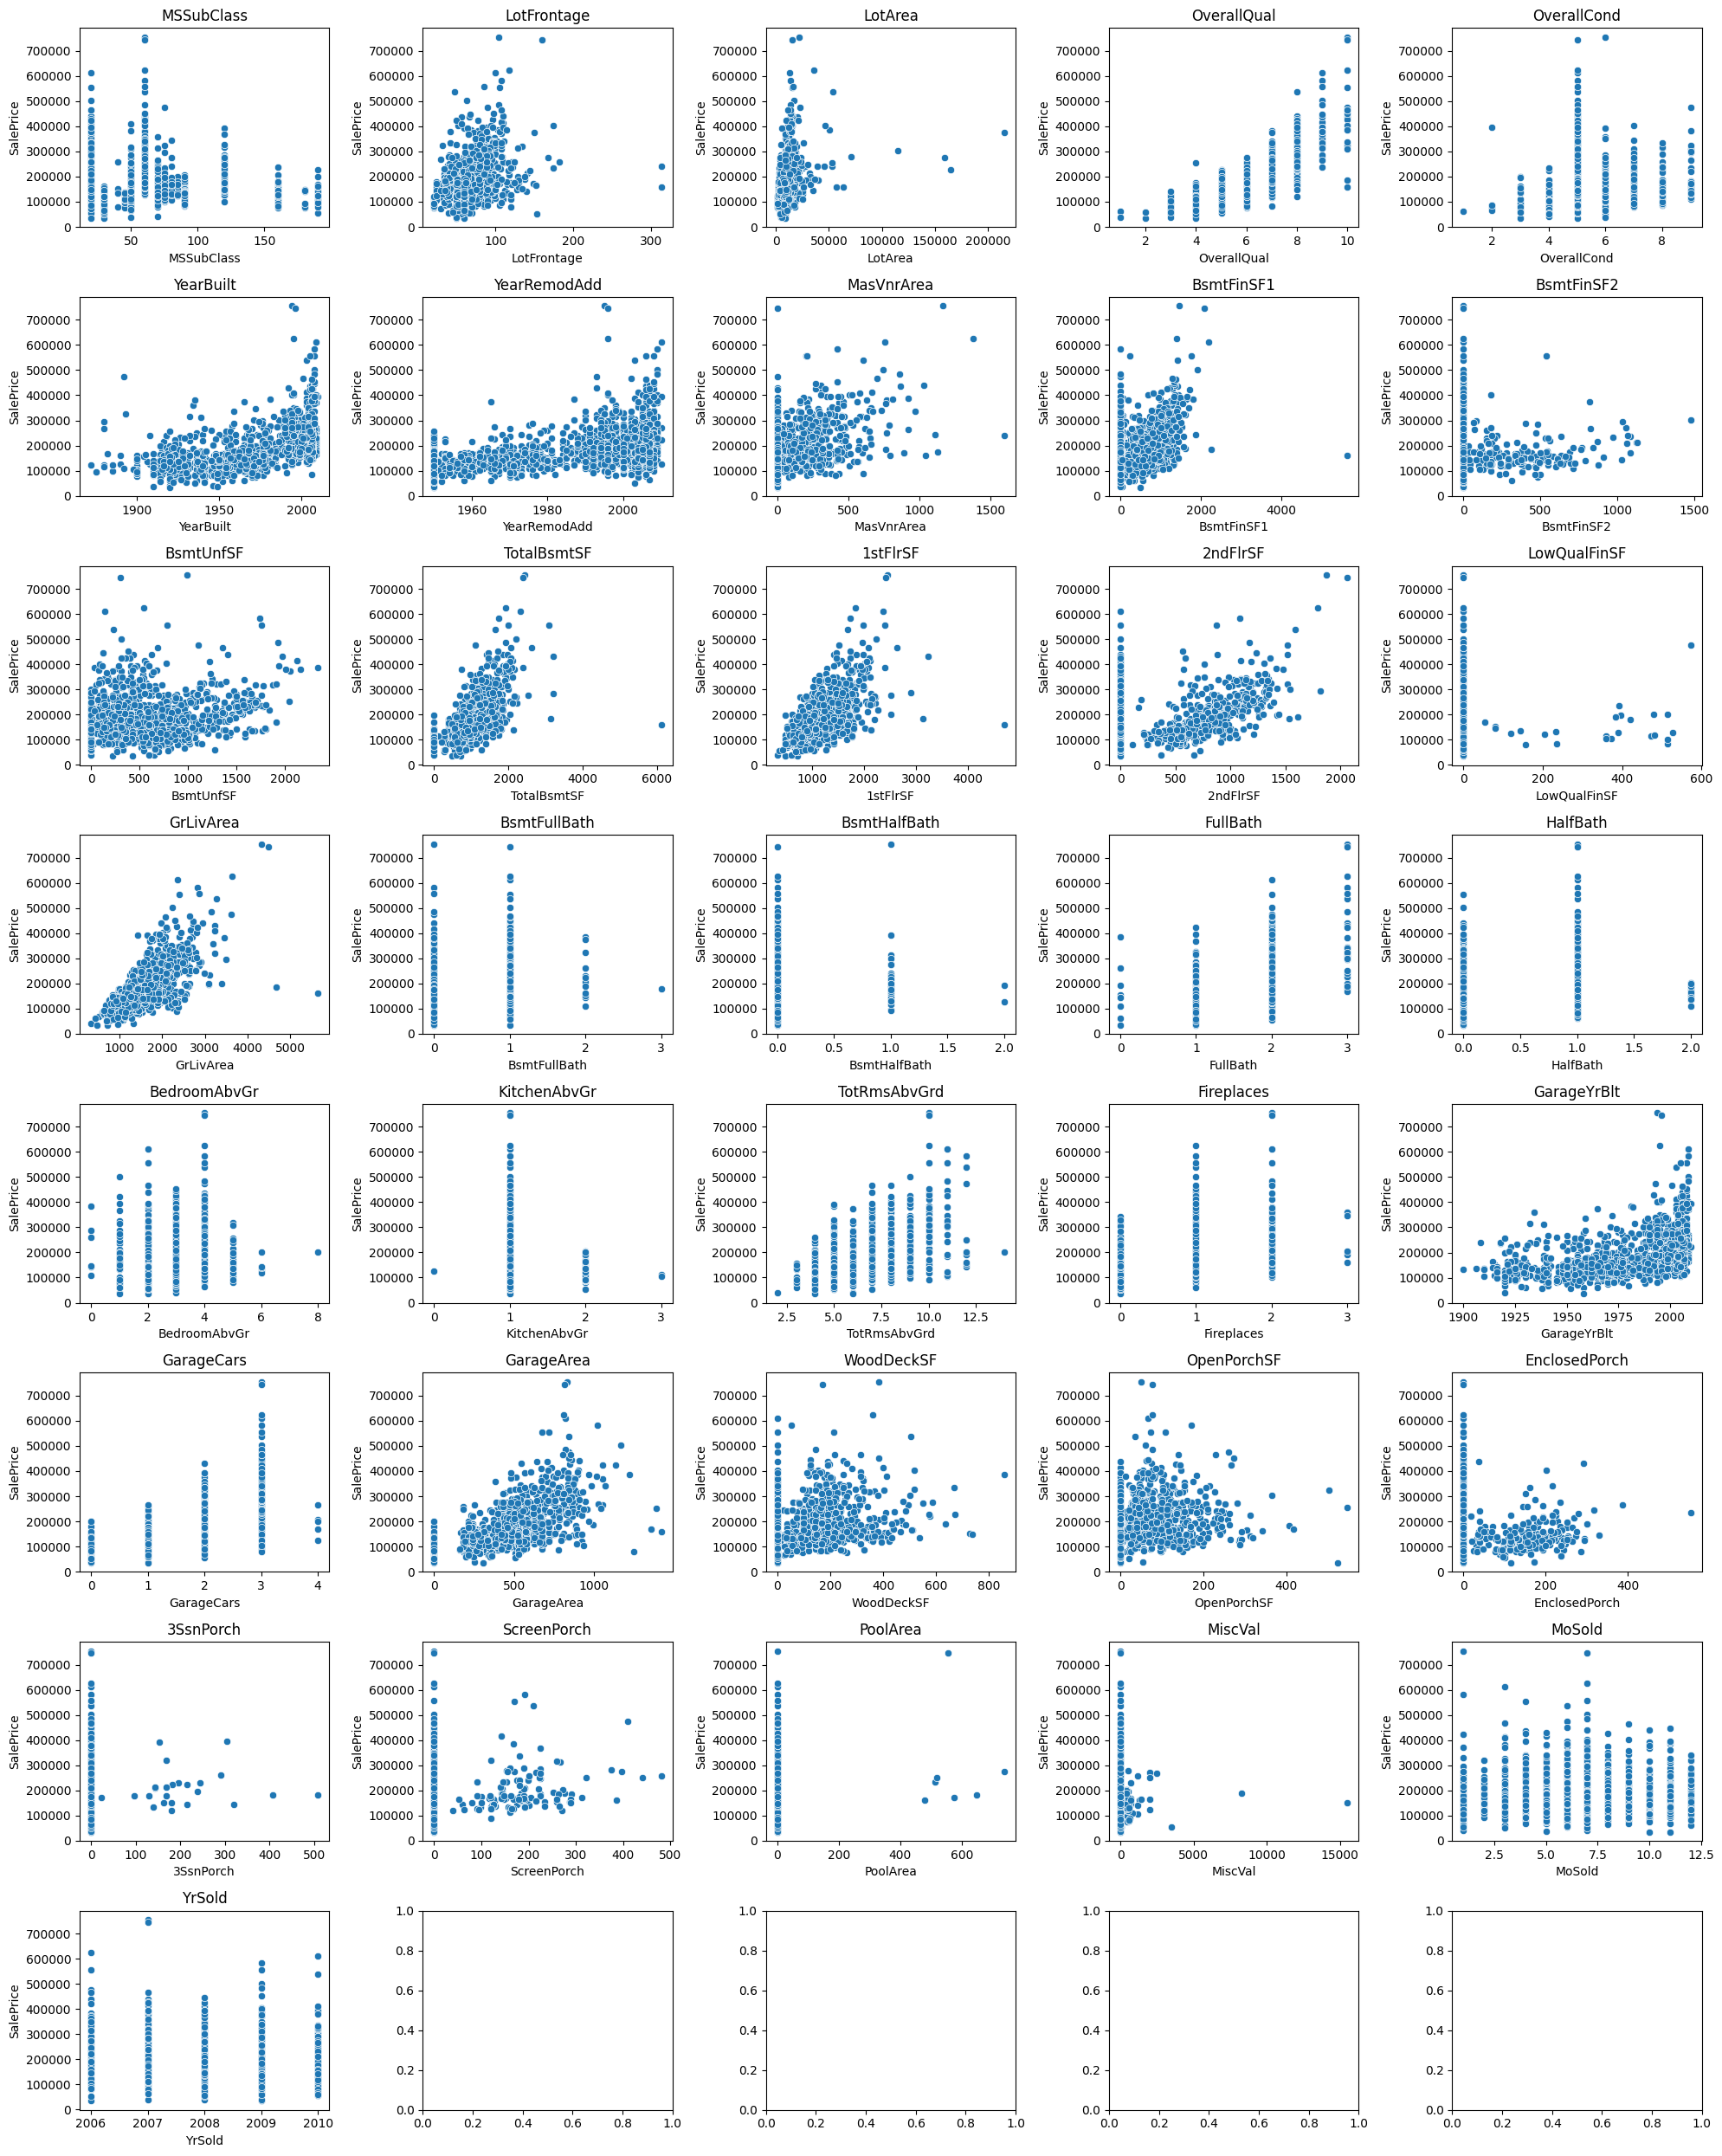

In [25]:
def num_features_vis(X):
    fig, ax = plt.subplots(8, 5, figsize=(20, 25))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='SalePrice').columns):
        sns.scatterplot(x=X[col], y=X['SalePrice'], ax=ax[i]);
        ax[i].set_title(col)

    plt.tight_layout()


num_features_vis(df_train_num)

In [26]:
# еще раз посмотрим на коэф. корреляции
df_train_num.corr()['SalePrice'][df_train_num.corr()['SalePrice'].abs() > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [27]:
# на графиках scatterplot видны дома, которые являются выбросами
# попробуем убрать их и посмотреть, как изменится коэф. корреляции
outliers = df_train_num[df_train_num['LotFrontage'] > 300].index
df_train.loc[outliers]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [28]:
df_train_num[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In [29]:
df_train_num.drop(index=outliers)[['LotFrontage', 'SalePrice']].corr()
# коэф. корреляции вырос, но не существенно

,LotFrontage,SalePrice
LotFrontage,1.00000,0.38113
SalePrice,0.38113,1.00000


In [30]:
# выберем признаки, которые имеют коэф. корреляции по модулю не менее 0.5 с SalePrice (в том числе и сама SalePrice)
num_featues = df_train_num.corr()['SalePrice'][df_train_num.corr()['SalePrice'].abs() > 0.5].index.tolist()
num_featues

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Попробуем взять большое количество признаков, при этом следует избегать возможной мультиколлинеарности

In [31]:
# добавим некоторые признаки (на основе scatterplot), которые могут быть полезны
num_featues += ['MSSubClass', 'LotFrontage', 'LotArea', '2ndFlrSF']
num_featues

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 '2ndFlrSF']

In [32]:
# очевидно, что GarageCars и GarageArea сильно коррелируют между собой
# поэтому удалим один из них
num_featues.remove('GarageCars')

In [33]:
df_train[num_featues].corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice,MSSubClass,LotFrontage,LotArea,2ndFlrSF
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.562022,0.790982,0.032628,0.251646,0.105806,0.295493
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.478954,0.522897,0.027850,0.123349,0.014228,0.010308
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.371600,0.507101,0.040581,0.088866,0.013788,0.140024
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.486665,0.613581,-0.238518,0.392075,0.260833,-0.174512
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.489782,0.605852,-0.251758,0.457181,0.299475,-0.202646
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.468997,0.708624,0.074853,0.402797,0.263116,0.687501
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.405656,0.560664,0.131608,0.198769,0.126031,0.421378
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.337822,0.533723,0.040380,0.352096,0.190015,0.616423
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,1.000000,0.623431,-0.098672,0.344997,0.180403,0.138347
SalePrice,0.790982,0.522897,0.507101,0.613581,0.605852,0.708624,0.560664,0.533723,0.623431,1.000000,-0.084284,0.351799,0.263843,0.319334


In [34]:
# также удалим TotalBsmtSF (коррелирует с 1stFlrSF)
# и TotRmsAbvGrd (коррелирует с GrLivArea)
# целевую переменную отсюда уберем
num_featues.remove('TotalBsmtSF')
num_featues.remove('TotRmsAbvGrd')
num_featues.remove('SalePrice')
num_featues

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'GarageArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 '2ndFlrSF']

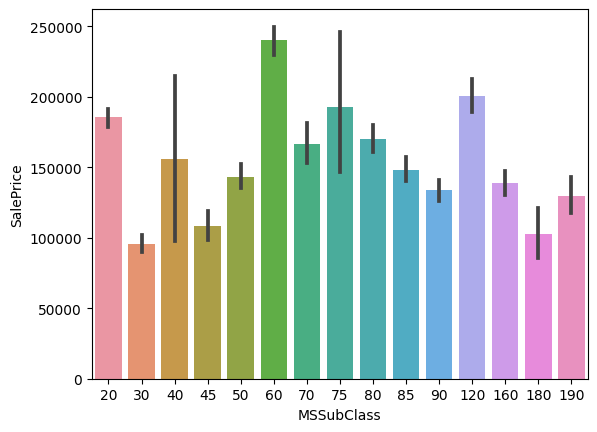

In [35]:
# признак MSSubClass является количественным дискретным - по сути, 
# категориальным номинальным - поэтому сразу добавим его в cat_features
sns.barplot(x=df_train_num['MSSubClass'], y=df_train_num['SalePrice']);

In [36]:
num_featues.remove('MSSubClass')
cat_features.append('MSSubClass')

**Выводы**

Имеется большое количество признаков, многие из которых важны. Единственно правильного варианта выделения признаков здесь нет, вариантов много. Попробуем взять большое число признаков

# 3. Обработка данных

Будем работать отдельно с категориальными и количественными признаками, как и ранее

In [37]:
# разделим данные на признаки и таргет
X_train_cat = df_train[cat_features]
X_train_num = df_train[num_featues]
y_train = df_train['SalePrice']

X_test_cat = df_test[cat_features]
X_test_num = df_test[num_featues]

**3.1 Обработка пропусков**

**Категориальные признаки**

In [38]:
X_train_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
Utilities           0
Neighborhood        0
Condition1          0
Condition2          0
HouseStyle          0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
Foundation          0
BsmtQual           37
BsmtCond           37
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
PoolQC           1453
MiscFeature      1406
SaleType            0
SaleCondition       0
MSSubClass          0
dtype: int64

In [39]:
X_test_cat.isnull().sum()

MSZoning            4
Street              0
Alley            1352
Utilities           2
Neighborhood        0
Condition1          0
Condition2          0
HouseStyle          0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
ExterQual           0
Foundation          0
BsmtQual           44
BsmtCond           45
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
PoolQC           1456
MiscFeature      1408
SaleType            1
SaleCondition       0
MSSubClass          0
dtype: int64

Как указывалось в разделе EDA, для большинства признаков пропуск означает отсутствие данной характеристики дома. Поэтому для них всех (кроме Electrical, Utilities, KitchenQual, Functional и SaleType), заполним пропуски 0, для остальных - заполним модой (там почти нет пропусков).

Примечание - используем 0 как строку, а не число, т.к. в дальнейшем при кодировании данные должны быть единообразны

In [40]:
X_train_cat.loc[:, 'Electrical'] = X_train_cat['Electrical'].fillna(X_train_cat['Electrical'].mode()[0])
X_train_cat = X_train_cat.fillna('0')

X_test_cat.loc[:, 'Utilities'] = X_test_cat['Utilities'].fillna(X_test_cat['Utilities'].mode()[0])
X_test_cat.loc[:, 'KitchenQual'] = X_test_cat['KitchenQual'].fillna(X_test_cat['KitchenQual'].mode()[0])
X_test_cat.loc[:, 'Functional'] = X_test_cat['Functional'].fillna(X_test_cat['Functional'].mode()[0])
X_test_cat.loc[:, 'SaleType'] = X_test_cat['SaleType'].fillna(X_test_cat['SaleType'].mode()[0])
X_test_cat = X_test_cat.fillna('0')

In [41]:
# пропусков не осталось
X_train_cat.isnull().sum().sum(), X_test_cat.isnull().sum().sum()

(0, 0)

**Количественные признаки**

In [42]:
X_train_num.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
1stFlrSF          0
GrLivArea         0
FullBath          0
GarageArea        0
LotFrontage     259
LotArea           0
2ndFlrSF          0
dtype: int64

In [43]:
X_test_num.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
1stFlrSF          0
GrLivArea         0
FullBath          0
GarageArea        1
LotFrontage     227
LotArea           0
2ndFlrSF          0
dtype: int64

Можно предположить, что пропуск в данном случае также означает отсутствие данной характеристики дома (Lot Frontage - длина улицы, примыкающей к дому; GarageArea - площадь гаража). Поэтому заполним все нулями

In [44]:
X_train_num = X_train_num.fillna(0)
X_test_num = X_test_num.fillna(0)

In [45]:
# пропусков не осталось
X_train_num.isnull().sum().sum(), X_test_num.isnull().sum().sum()

(0, 0)

**3.2 Работа с выбросами**

In [46]:
# оценим процент выбросов для каждого признака через IQR
def outlier_count(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR

    # доля выбросов для каждого признака в процентах
    quantity = ((X >= upper_bound) | (X <= lower_bound)).sum(axis=0) / X.shape[0] * 100
    return quantity.sort_values(ascending=False)


outlier_count(X_train_num)
# выбросов не так много

LotArea         4.726027
GrLivArea       2.123288
OverallQual     1.575342
GarageArea      1.438356
1stFlrSF        1.369863
LotFrontage     1.095890
YearBuilt       0.616438
2ndFlrSF        0.136986
FullBath        0.000000
YearRemodAdd    0.000000
dtype: float64

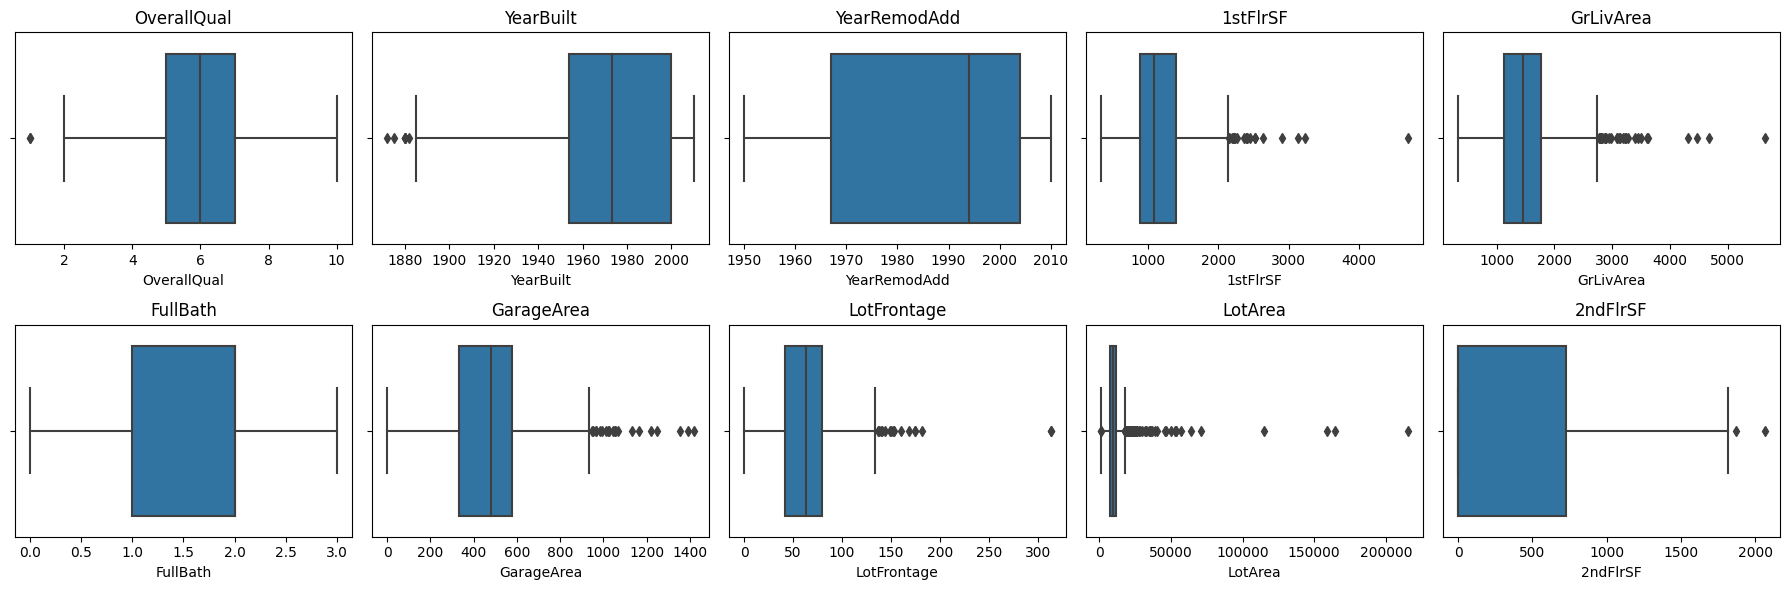

In [47]:
# посмотрим на выбросы
def outliers_vis(X):
    fig, ax = plt.subplots(2, 5, figsize=(18, 6))
    ax = ax.flatten()
    for i, col in enumerate(X.columns):
        sns.boxplot(x=X[col], ax=ax[i]);
        ax[i].set_title(col)

    plt.tight_layout()


outliers_vis(X_train_num)

In [48]:
# выберем признаки, для которых есть смысл удалять выбросы
# это признаки, связанные с площадью или размерами (см. boxplot и scatterplot выше)
features_with_outliers = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'GarageArea']

def outlier_remove(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    
    # маска, соответствующая значениям без выбросов в данных столбцах
    mask = ((X >= lower_bound) & (X <= upper_bound)).all(axis=1)
    return mask

mask_for_outliers = outlier_remove(X_train_num[features_with_outliers])
# эту маску применим далее в случае удаления выбросов (в том числе и к X_train_cat)

**3.3 Кодирование категориальных переменных**

В данном случае некоторые категориальные признаки имеют ранжированность (это указано в документации). Поэтому есть смысл использовать это при кодировании 

In [49]:
# учитываем, что ранее заполняли пропуски нулями (строковыми значениями)
X_train_cat.loc[:, 'Utilities'] = X_train_cat['Utilities'].map({
    'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
X_train_cat.loc[:, 'ExterQual'] = X_train_cat['ExterQual'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train_cat.loc[:, 'BsmtQual'] = X_train_cat['BsmtQual'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_train_cat.loc[:, 'BsmtCond'] = X_train_cat['BsmtCond'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_train_cat.loc[:, 'HeatingQC'] = X_train_cat['HeatingQC'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train_cat.loc[:, 'CentralAir'] = X_train_cat['CentralAir'].map({
    'Y': 1, 'N': 0})
X_train_cat.loc[:, 'KitchenQual'] = X_train_cat['KitchenQual'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train_cat.loc[:, 'FireplaceQu'] = X_train_cat['FireplaceQu'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_train_cat.loc[:, 'GarageFinish'] = X_train_cat['GarageFinish'].map({
    'Fin': 3, 'RFn': 2, 'Unf': 1, '0': 0})
X_train_cat.loc[:, 'PoolQC'] = X_train_cat['PoolQC'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, '0': 0})

In [50]:
# то же самое для test
X_test_cat.loc[:, 'Utilities'] = X_test_cat['Utilities'].map({
    'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
X_test_cat.loc[:, 'ExterQual'] = X_test_cat['ExterQual'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_test_cat.loc[:, 'BsmtQual'] = X_test_cat['BsmtQual'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_test_cat.loc[:, 'BsmtCond'] = X_test_cat['BsmtCond'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_test_cat.loc[:, 'HeatingQC'] = X_test_cat['HeatingQC'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_test_cat.loc[:, 'CentralAir'] = X_test_cat['CentralAir'].map({
    'Y': 1, 'N': 0})
X_test_cat.loc[:, 'KitchenQual'] = X_test_cat['KitchenQual'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_test_cat.loc[:, 'FireplaceQu'] = X_test_cat['FireplaceQu'].map({
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
X_test_cat.loc[:, 'GarageFinish'] = X_test_cat['GarageFinish'].map({
    'Fin': 3, 'RFn': 2, 'Unf': 1, '0': 0})
X_test_cat.loc[:, 'PoolQC'] = X_test_cat['PoolQC'].map({
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, '0': 0})

In [51]:
# закодированные порядковые признаки назовем ordinal_cat_features
# остальные категориальные признаки (other_cat_features) закодируем через OneHotEncoder
ordinal_cat_features = ['Utilities', 'ExterQual', 'BsmtQual', 'BsmtCond','HeatingQC',
                        'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'PoolQC']
other_cat_features = list(set(cat_features) - set(ordinal_cat_features))
other_cat_features

['Condition2',
 'MSSubClass',
 'Neighborhood',
 'SaleCondition',
 'Foundation',
 'Exterior1st',
 'Heating',
 'MiscFeature',
 'HouseStyle',
 'Exterior2nd',
 'SaleType',
 'MasVnrType',
 'Street',
 'Electrical',
 'Alley',
 'Functional',
 'GarageType',
 'MSZoning',
 'Condition1']

In [52]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_X_train_cat = pd.DataFrame(onehotencoder.fit_transform(X_train_cat[other_cat_features]))
encoded_X_train_cat.columns = onehotencoder.get_feature_names_out() # добавляем названия столбцов

X_train_cat = X_train_cat.join(encoded_X_train_cat) # присоединим новые признаки к исходному датафрейму
X_train_cat = X_train_cat.drop(columns=other_cat_features) # удалим исходные признаки

X_train_cat

,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC,...,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,3,3,4,3,4,1,3,0,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2,4,3,4,1,2,3,2,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,4,3,4,1,3,3,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,3,4,3,1,3,4,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3,4,3,4,1,3,3,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,4,3,4,1,2,3,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,3,2,4,3,2,1,2,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,3,4,3,4,4,1,3,4,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,3,2,3,3,3,1,3,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# то же самое для test
encoded_X_test_cat = pd.DataFrame(onehotencoder.transform(X_test_cat[other_cat_features]))
encoded_X_test_cat.columns = onehotencoder.get_feature_names_out() # добавляем названия столбцов

X_test_cat = X_test_cat.join(encoded_X_test_cat) # присоединим новые признаки к исходному датафрейму
X_test_cat = X_test_cat.drop(columns=other_cat_features) # удалим исходные признаки

X_test_cat

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5, 9, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC,...,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,3,2,3,3,2,1,2,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2,3,3,2,1,3,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,4,3,3,1,2,3,3,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,3,3,4,1,3,4,3,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3,4,3,4,1,3,0,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,2,3,3,3,1,2,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,3,2,3,3,2,1,2,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,3,2,3,3,4,1,2,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,3,2,4,3,2,1,2,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# признаки ordinal_cat_features имеют тип object
# преобразуем их к int и сразу добавим в X_train_num, удалив из X_train_cat
X_train_num = X_train_num.join(X_train_cat[ordinal_cat_features].astype('int64'))
X_train_cat = X_train_cat.drop(columns=ordinal_cat_features)
X_train_num

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageArea,LotFrontage,LotArea,2ndFlrSF,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
0,7,2003,2003,856,1710,2,548,65.0,8450,854,3,3,4,3,4,1,3,0,2,0
1,6,1976,1976,1262,1262,2,460,80.0,9600,0,3,2,4,3,4,1,2,3,2,0
2,7,2001,2002,920,1786,2,608,68.0,11250,866,3,3,4,3,4,1,3,3,2,0
3,7,1915,1970,961,1717,1,642,60.0,9550,756,3,2,3,4,3,1,3,4,1,0
4,8,2000,2000,1145,2198,2,836,84.0,14260,1053,3,3,4,3,4,1,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,1647,2,460,62.0,7917,694,3,2,4,3,4,1,2,3,2,0
1456,6,1978,1988,2073,2073,2,500,85.0,13175,0,3,2,4,3,2,1,2,3,1,0
1457,7,1941,2006,1188,2340,2,252,66.0,9042,1152,3,4,3,4,4,1,3,4,2,0
1458,5,1950,1996,1078,1078,1,240,68.0,9717,0,3,2,3,3,3,1,3,0,1,0


In [55]:
# то же самое для test
X_test_num = X_test_num.join(X_test_cat[ordinal_cat_features].astype('int64'))
X_test_cat = X_test_cat.drop(columns=ordinal_cat_features)
X_test_num

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageArea,LotFrontage,LotArea,2ndFlrSF,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
0,5,1961,1961,896,896,1,730.0,80.0,11622,0,3,2,3,3,2,1,2,0,1,0
1,6,1958,1958,1329,1329,1,312.0,81.0,14267,0,3,2,3,3,2,1,3,0,1,0
2,5,1997,1998,928,1629,2,482.0,74.0,13830,701,3,2,4,3,3,1,2,3,3,0
3,6,1998,1998,926,1604,2,470.0,78.0,9978,678,3,2,3,3,4,1,3,4,3,0
4,8,1992,1992,1280,1280,2,506.0,43.0,5005,0,3,3,4,3,4,1,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546,1092,1,0.0,21.0,1936,546,3,2,3,3,3,1,2,0,0,0
1455,4,1970,1970,546,1092,1,286.0,21.0,1894,546,3,2,3,3,2,1,2,0,1,0
1456,5,1960,1996,1224,1224,1,576.0,160.0,20000,0,3,2,3,3,4,1,2,3,1,0
1457,5,1992,1992,970,970,1,0.0,62.0,10441,0,3,2,4,3,2,1,2,0,0,0


**3.4 Масштабирование и преобразование числовых признаков**

In [56]:
# преобразуем признаки YearBuilt и YearRemodAdd, предполагая, что
# данные актуальны на 2016 год (указано на странице соревнования)
# также переименуем признаки
X_train_num.loc[:, ['YearBuilt', 'YearRemodAdd']] = 2016 - X_train_num[['YearBuilt', 'YearRemodAdd']]
X_test_num.loc[:, ['YearBuilt', 'YearRemodAdd']] = 2016 - X_test_num[['YearBuilt', 'YearRemodAdd']]

X_train_num = X_train_num.rename(columns={'YearBuilt': 'YearSinceBuilt', 'YearRemodAdd': 'YearSinceRemodAdd'})
X_test_num = X_test_num.rename(columns={'YearBuilt': 'YearSinceBuilt', 'YearRemodAdd': 'YearSinceRemodAdd'})

In [57]:
# посмотрим, насколько числовые признаки близки к нормальному распределению
from scipy.stats import kstest, shapiro, skew 

def norm_distr_check(X):
    df_norm_distr = pd.DataFrame(columns=['Критерий Колмогорова-Смирнова (p-value)', 
                                          'Критерий Шапиро-Уилка (p-value)', 
                                          'Коэффициент асимметрии']
                                            ) # пустой фрейм под результаты
    for col in X.columns:
        df_norm_distr.loc[col, 'Критерий Колмогорова-Смирнова (p-value)'] = kstest(X[col], 'norm').pvalue
        df_norm_distr.loc[col, 'Критерий Шапиро-Уилка (p-value)'] = shapiro(X[col]).pvalue
        df_norm_distr.loc[col, 'Коэффициент асимметрии'] = skew(X[col])
        
    return df_norm_distr


norm_distr_check(X_train_num)
# можно сделать вывод, что все числовые признаки имеют отличное от нормального распределение

,Критерий Колмогорова-Смирнова (p-value),Критерий Шапиро-Уилка (p-value),Коэффициент асимметрии
OverallQual,0.0,0.0,0.216721
YearSinceBuilt,0.0,0.0,0.612831
YearSinceRemodAdd,0.0,0.0,0.503044
1stFlrSF,0.0,0.0,1.375342
GrLivArea,0.0,0.0,1.365156
FullBath,0.0,0.0,0.036524
GarageArea,0.0,0.0,0.179796
LotFrontage,0.0,0.0,0.267547
LotArea,0.0,0.0,12.195142
2ndFlrSF,0.0,0.0,0.812194


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

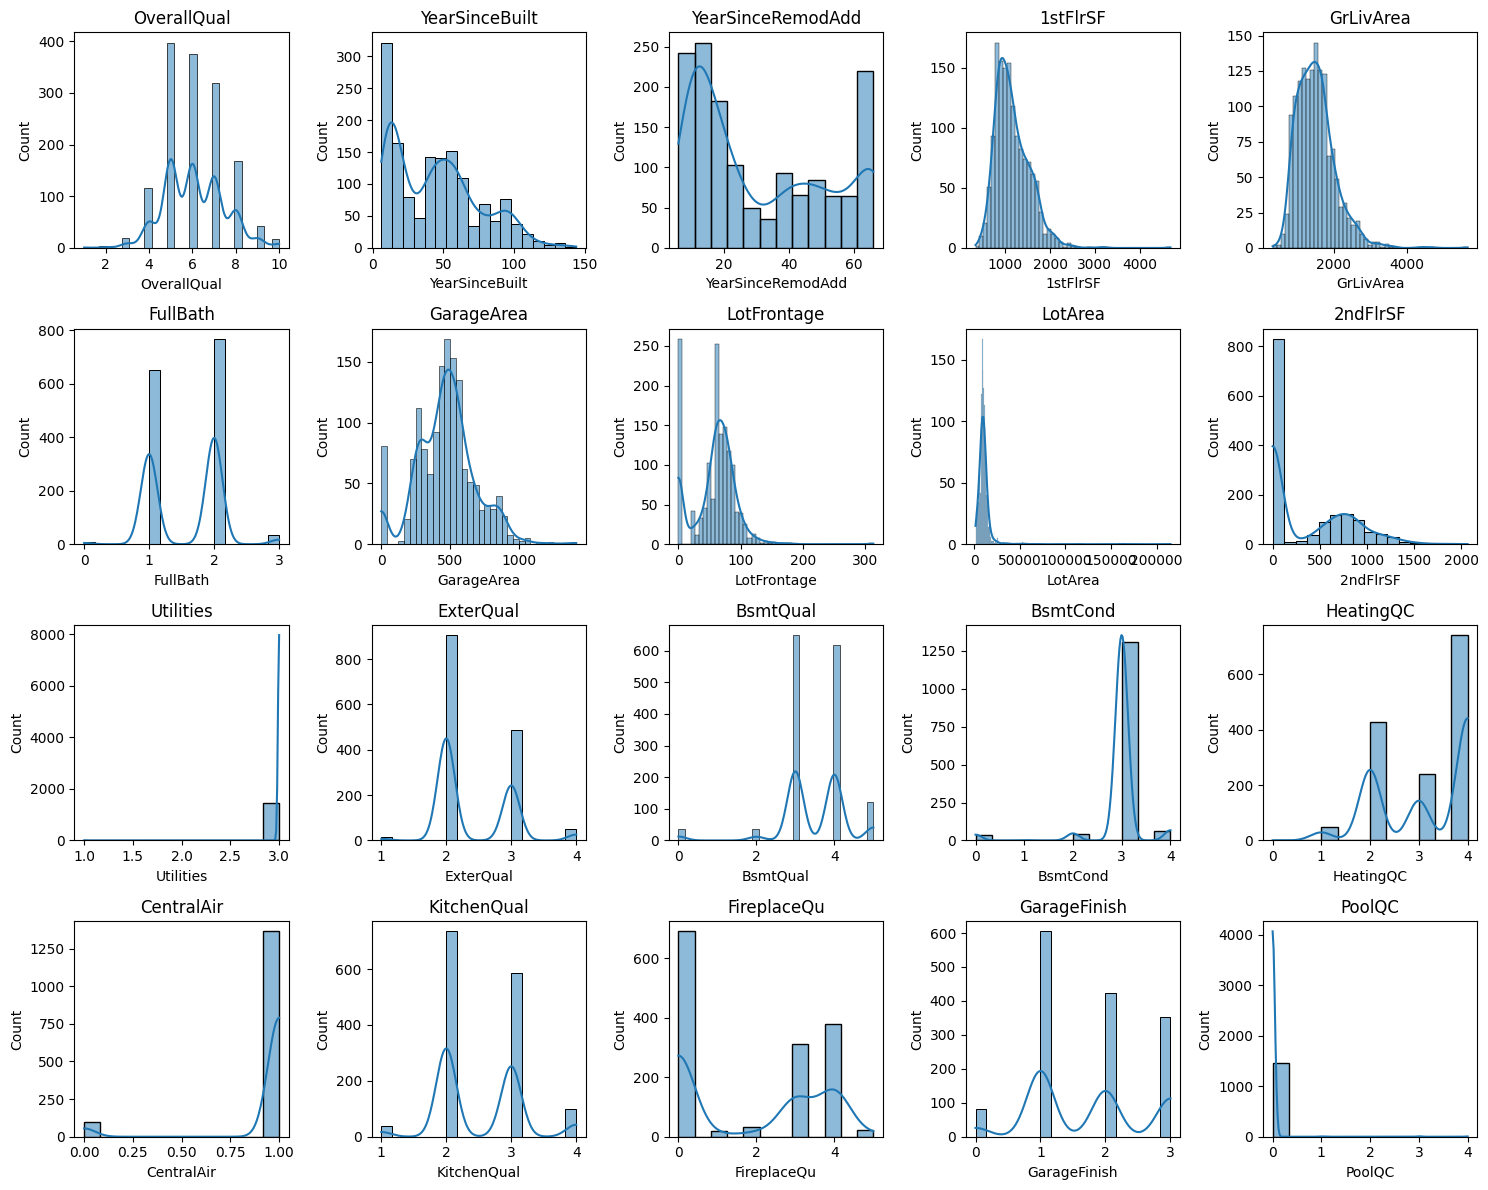

In [58]:
# оценим распределения числовых признаков визуально
def feature_vis(X):
    fig, ax = plt.subplots(4, 5, figsize=(15, 12))
    ax = ax.flatten()

    for i, col in enumerate(X.columns):
        sns.histplot(X[col], ax=ax[i], kde=True);
        ax[i].set_title(col)

    plt.tight_layout()


feature_vis(X_train_num)

In [59]:
# сравним различные варианты преобразований признаков
# в данном случае в датафрейме есть нулевые значения, поэтому
# используем преобразование Йео-Джонсона
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

def feature_transform_score(X):
    transform_scores = pd.DataFrame() # пустой фрейм под результаты
    for col in X.columns:
        # по умолчанию к преобразованным данным применяется нормализация с нулевым средним и единичной дисперсией
        yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
        
        transform_scores.loc['Original distribution', col] = skew(X[col])
        transform_scores.loc['Yeo-Johnson transformation', col] = skew(yeo_johnson.fit_transform(X[[col]]))
        transform_scores.loc['Log transformation', col] = skew(np.log1p(X[col]))
        transform_scores.loc['Sqrt transformation', col] = skew(np.sqrt(X[col]))

    return transform_scores


transform_scores = feature_transform_score(X_train_num)
transform_scores

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,OverallQual,YearSinceBuilt,YearSinceRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageArea,LotFrontage,LotArea,2ndFlrSF,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
Original distribution,0.216721,0.612831,0.503044,1.375342,1.365156,0.036524,0.179796,0.267547,12.195142,0.812194,-38.170678,0.825140,-1.286247,-3.697230,-0.539902,-3.526757,0.386368,0.112654,0.119744,16.834252
Yeo-Johnson transformation,0.018215,-0.087884,0.002526,-0.001105,0.000171,-0.049384,-0.327897,-0.542898,0.026542,0.280436,-38.170678,-0.029515,0.062190,0.702960,-0.333935,-3.526757,-0.000492,-0.019809,-0.062289,14.337930
Log transformation,-0.590370,-0.309929,0.006725,0.080032,-0.006134,-0.394229,-3.479025,-1.552179,-0.137263,0.289346,-38.170678,0.466399,-3.610069,-5.145627,-0.882444,-3.526757,-0.130454,-0.023606,-0.629140,15.711689
Sqrt transformation,-0.218064,0.107230,0.260211,0.623621,0.593644,-0.779461,-1.598365,-1.147533,4.135459,0.421898,-38.170678,0.572241,-3.692867,-5.262089,-0.826445,-3.526757,0.020740,-0.034132,-1.102801,15.399794


**Нужно ли применять преобразования к упорядоченным признакам (Utilities и пр.)?
В данном случае применяются ко всем признакам**

In [60]:
# теперь применим соответствующее преобразование ко всем столбцам,
# чтобы добиться минимальной асимметрии
# применяем для test те же преобразования, что и для train (по тем же столбцам)

def apply_transformations(X, scores):
    # сделаем копию датафрейма, чтобы исходный датафрейм и преобразованный были независимы 
    X_transformed = X.copy()
    
    # нужны модули значений
    scores = scores.abs().idxmin(axis=0)
    
    yeo_transform_cols = scores[scores == 'Yeo-Johnson transformation'].index.tolist()
    log_transform_cols = scores[scores == 'Log transformation'].index.tolist()
    sqrt_transform_cols = scores[scores == 'Sqrt transformation'].index.tolist()

    for col in yeo_transform_cols:
        # не применяем нормализацию, т.к. к log и sqrt она не применяется
        # (чтобы потом применить Scaler ко всем признакам сразу)
        yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
        X_transformed.loc[:, col] = yeo_johnson.fit_transform(X_transformed[[col]])

    for col in log_transform_cols:
        X_transformed.loc[:, col] = np.log1p(X_transformed[col])
        
    for col in sqrt_transform_cols:
        X_transformed.loc[:, col] = np.sqrt(X_transformed[col])

    return X_transformed


X_train_num_transformed = apply_transformations(X_train_num, transform_scores)
X_test_num_transformed = apply_transformations(X_test_num, transform_scores)

X_train_num_transformed.head()

/tmp/ipykernel_19/708138438.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.69101781 4.14537817 4.69101781 ... 4.69101781 3.57568372 3.57568372]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[:, col] = yeo_johnson.fit_transform(X_transformed[[col]])
/tmp/ipykernel_19/708138438.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.83448346 6.35606261 4.10985549 ... 8.16787112 7.7731623  7.01862999]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[:, col] = yeo_johnson.fit_transform(X_transformed[[col]])
/tmp/ipykernel_19/708138438.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.61321009 3.66252831 2.68083851 ... 2.37654335 3.01015732 3.893

,OverallQual,YearSinceBuilt,YearSinceRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageArea,LotFrontage,LotArea,2ndFlrSF,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
0,4.691018,3.834483,2.613210,5.219622,7.600485,2,548,65.0,10.427531,4.527843,1.732051,0.768971,12.126884,25.850942,16.435286,0.693147,1.627317,0.000000,1.645273,-0.0
1,4.145378,6.356063,3.662528,5.442275,7.284380,2,460,80.0,10.596445,-0.000000,1.732051,0.680747,12.126884,25.850942,16.435286,0.693147,1.246592,1.426698,1.645273,-0.0
2,4.691018,4.109855,2.680839,5.261496,7.645781,2,608,68.0,10.807340,4.533734,1.732051,0.768971,12.126884,25.850942,16.435286,0.693147,1.627317,1.426698,1.645273,-0.0
3,4.691018,9.142790,3.795299,5.286702,7.604740,1,642,60.0,10.589519,4.475937,1.732051,0.680747,7.565912,53.025568,9.742923,0.693147,1.627317,1.664065,0.889359,-0.0
4,5.216463,4.238161,2.803437,5.387109,7.862156,2,836,84.0,11.124530,4.615200,1.732051,0.768971,12.126884,25.850942,16.435286,0.693147,1.627317,1.426698,1.645273,-0.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

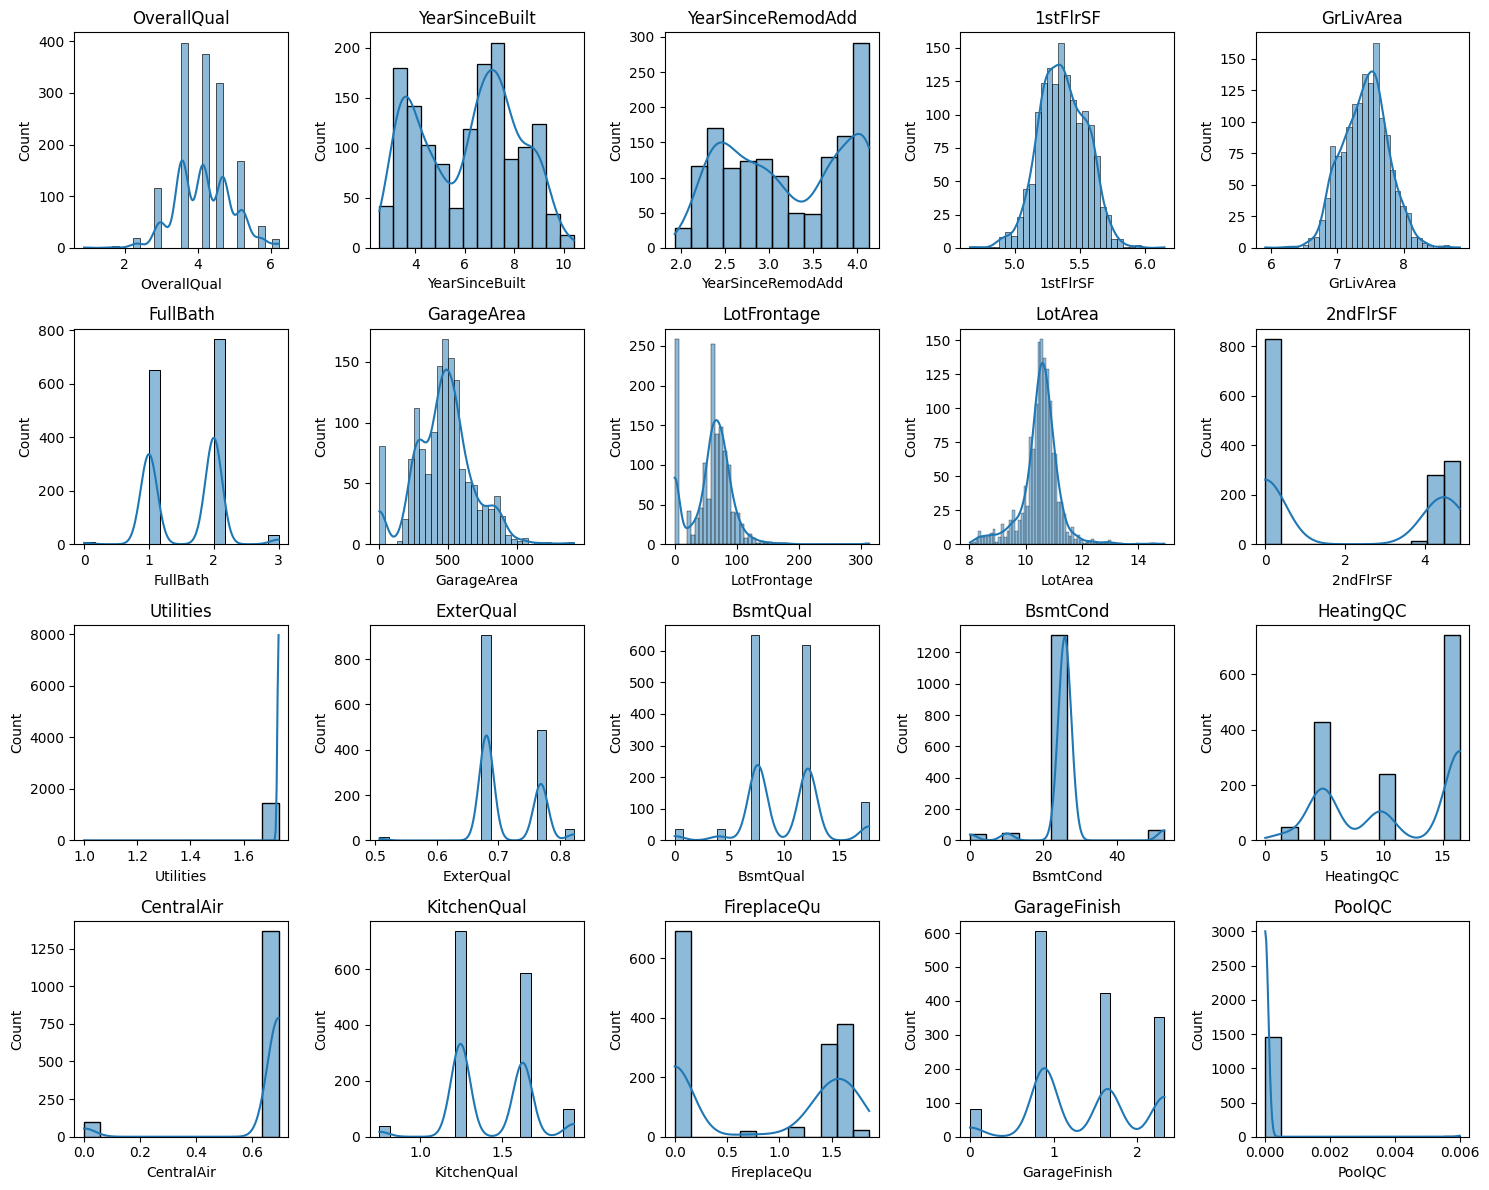

In [61]:
# оценим распределения числовых признаков теперь
feature_vis(X_train_num_transformed)

In [62]:
# полученные датафреймы также без пропусков
X_train_num_transformed.isnull().sum().sum(), X_test_num_transformed.isnull().sum().sum()

(0, 0)

**На текущем этапе получили датафреймы X_train_num_transformed и X_test_num_transformed с преобразованными числовыми признаками, которые можно использовать в дальнейшем вместо X_train_num и X_test_num (нормализовывать и т.д.)**

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# нормализуем числовые признаки и сразу присоединим их к закодированным категориальным
# здесь можно использовать либо X_train_num и X_test_num, либо X_train_num_transformed и X_test_num_transformed
X_train_scaled = X_train_cat.join(pd.DataFrame(scaler.fit_transform(X_train_num_transformed), columns=X_train_num_transformed.columns))
X_test_scaled = X_test_cat.join(pd.DataFrame(scaler.transform(X_test_num_transformed), columns=X_test_num_transformed.columns))

In [64]:
X_train_scaled.head()

,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.101300,0.576092,-0.005020,0.927470,0.263813,0.773361,-1.037044,0.362171,-0.069409
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,-0.654098,0.576092,-0.005020,0.927470,0.263813,-0.746935,0.801869,0.362171,-0.069409
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.101300,0.576092,-0.005020,0.927470,0.263813,0.773361,0.801869,0.362171,-0.069409
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,-0.654098,-0.695624,3.557948,-0.313464,0.263813,0.773361,1.107818,-0.776393,-0.069409
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.101300,0.576092,-0.005020,0.927470,0.263813,0.773361,0.801869,0.362171,-0.069409


In [65]:
X_test_scaled.head()

,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,Utilities,ExterQual,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,PoolQC
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.83029,-0.741729,0.673313,-1.169633,0.263813,-1.396974,-1.037044,-0.804703,-0.069409
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.83029,-0.741729,0.673313,-1.169633,0.263813,-0.283013,-1.037044,-0.804703,-0.069409
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.83029,0.487457,0.673313,-0.185575,0.263813,-1.396974,0.554067,1.230695,-0.069409
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,1.83029,-0.741729,0.673313,1.188605,0.263813,-0.283013,0.776794,1.230695,-0.069409
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02618,4.55901,0.487457,0.673313,1.188605,0.263813,-0.283013,-1.037044,0.276363,-0.069409


In [66]:
# финальная проверка на корректность данных
X_train_scaled.info()
print('-' * 100)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 162 entries, Condition2_Feedr to PoolQC
dtypes: float64(162)
memory usage: 1.8 MB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 162 entries, Condition2_Feedr to PoolQC
dtypes: float64(162)
memory usage: 1.8 MB


In [67]:
X_train_scaled.isnull().sum().sum(), X_test_scaled.isnull().sum().sum()

(0, 0)

**3.5 Конструирование признаков**

В данном случае дополнительные признаки не создаются.

Попробуем применить PCA, чтобы оценить вклад признаков

In [68]:
from sklearn.decomposition import PCA

pca = PCA(20)
pca.fit(X_train_scaled)

# процент дисперсии, объясняемый каждым из выбранных компонентов (собств. числа ковариационной матрицы)
pca.explained_variance_ratio_
# с учетом большого числа признаков есть смысл попробовать применить PCA

array([0.28801286, 0.07950337, 0.07669184, 0.04671788, 0.04014304,
       0.0376673 , 0.03482472, 0.03211979, 0.0294831 , 0.02587131,
       0.02493614, 0.02303468, 0.01891359, 0.01646795, 0.01465197,
       0.01319721, 0.01228132, 0.0117984 , 0.01088064, 0.01025378])

**3.6 Удаление выбросов**

Удалим выбросы, использую ранее полученную маску

In [69]:
"""
X_train_scaled = X_train_scaled[mask_for_outliers]
y_train = y_train[mask_for_outliers]
"""

'\nX_train_scaled = X_train_scaled[mask_for_outliers]\ny_train = y_train[mask_for_outliers]\n'

# 4. Моделирование и оценка результата

**4.1 SVM**

In [70]:
import optuna
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR

scores = pd.DataFrame() # пустой фрейм под все модели

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 6)
    C = trial.suggest_float('C', 1e-2, 1e5, log=True)
    svm_optuna = SVR(kernel=kernel, degree=degree, C=C)
    # минимизируем MSE (RMSE), т.к. в соревновании результат оценивается через нее
    score = cross_val_score(svm_optuna, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return score


def model_score(model):
    # здесь оценим метрики регрессии
    score = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=['neg_root_mean_squared_error', 'r2'])
    return {k: v.mean() for k, v in score.items()}


study = optuna.create_study(direction='maximize', study_name='SVM')
study.optimize(objective, n_trials=100)

svm_optuna_score = study.best_value
svm_optuna_params = study.best_params

scores.loc['SVM', 'Score'] = svm_optuna_score
scores.loc['SVM', 'Model_params'] = str([f'{k}: {v}' for k, v in svm_optuna_params.items()])

[I 2025-11-18 14:45:44,657] A new study created in memory with name: SVM
[I 2025-11-18 14:45:45,607] Trial 0 finished with value: -71942038378.99878 and parameters: {'kernel': 'sigmoid', 'degree': 3, 'C': 35553.80702460761}. Best is trial 0 with value: -71942038378.99878.
[I 2025-11-18 14:45:46,458] Trial 1 finished with value: -6548957641.55569 and parameters: {'kernel': 'rbf', 'degree': 4, 'C': 7.0507621107781855}. Best is trial 1 with value: -6548957641.55569.
[I 2025-11-18 14:45:47,599] Trial 2 finished with value: -1047521135.3043158 and parameters: {'kernel': 'rbf', 'degree': 2, 'C': 39306.81695184996}. Best is trial 2 with value: -1047521135.3043158.
[I 2025-11-18 14:45:51,835] Trial 3 finished with value: -1224221644.7892098 and parameters: {'kernel': 'linear', 'degree': 6, 'C': 11020.690803910038}. Best is trial 2 with value: -1047521135.3043158.
[I 2025-11-18 14:45:52,756] Trial 4 finished with value: -6623350987.698855 and parameters: {'kernel': 'sigmoid', 'degree': 3, 'C': 

In [71]:
svm_optuna_params

{'kernel': 'rbf', 'degree': 2, 'C': 99945.10670570802}

In [72]:
svm = SVR(kernel='rbf', degree=2, C=99857.05637120269)
model_score(svm)

{'fit_time': 0.25358104705810547,
 'score_time': 0.06085186004638672,
 'test_neg_root_mean_squared_error': -30085.517277656607,
 'test_r2': 0.8518976330815503}

In [73]:
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']
submission_svm = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_svm})
submission_svm.to_csv("submission_svm.csv", index=False)
print('✅ submission_svm.csv created successfully!')

# результат на test - 0.14683 без удаления выбросов
# результат на test - 0.14928 с удалением выбросов
# результат на test - 0.42613 без удаления выбросов с преобразованными данными ???

✅ submission_svm.csv created successfully!


**4.2 Random Forest**

In [74]:
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=1)
    rf_optuna = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion,
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf, random_state=42)
    score = cross_val_score(rf_optuna, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return score
    

study = optuna.create_study(direction='maximize', study_name='Random Forest')
study.optimize(objective, n_trials=100)

rf_optuna_score = study.best_value
rf_optuna_params = study.best_params

scores.loc['Random Forest', 'Score'] = rf_optuna_score
scores.loc['Random Forest', 'Model_params'] = str([f'{k}: {v}' for k, v in rf_optuna_params.items()])

[I 2025-11-18 14:50:24,150] A new study created in memory with name: Random Forest
[I 2025-11-18 14:50:30,808] Trial 0 finished with value: -1230167203.5812728 and parameters: {'n_estimators': 240, 'criterion': 'squared_error', 'min_samples_split': 16, 'min_samples_leaf': 18}. Best is trial 0 with value: -1230167203.5812728.
[I 2025-11-18 14:50:41,954] Trial 1 finished with value: -1226448378.6490543 and parameters: {'n_estimators': 410, 'criterion': 'squared_error', 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 1 with value: -1226448378.6490543.
[I 2025-11-18 14:51:34,333] Trial 2 finished with value: -1307234768.4189427 and parameters: {'n_estimators': 170, 'criterion': 'absolute_error', 'min_samples_split': 18, 'min_samples_leaf': 19}. Best is trial 1 with value: -1226448378.6490543.
[I 2025-11-18 14:51:55,665] Trial 3 finished with value: -960785109.8330139 and parameters: {'n_estimators': 500, 'criterion': 'squared_error', 'min_samples_split': 9, 'min_samples_leaf

In [75]:
rf_optuna_params

{'n_estimators': 440,
 'criterion': 'friedman_mse',
 'min_samples_split': 4,
 'min_samples_leaf': 2}

In [76]:
rf = RandomForestRegressor(n_estimators=270, criterion='friedman_mse',
                           min_samples_split=3, min_samples_leaf=2,
                           random_state=42)
model_score(rf)

{'fit_time': 2.666464376449585,
 'score_time': 0.0190279483795166,
 'test_neg_root_mean_squared_error': -30578.144896177208,
 'test_r2': 0.8501922967208759}

In [77]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']
submission_rf = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_rf})
submission_rf.to_csv("submission_rf.csv", index=False)
print('✅ submission_rf.csv created successfully!')

# результат на test - 0.15207 без удаления выбросов
# результат на test - 0.15479 с удалением выбросов
# результат на test - 0.30563 без удаления выбросов с преобразованными данными ???

✅ submission_rf.csv created successfully!


**4.3 AdaBoost**

In [78]:
from sklearn.ensemble import AdaBoostRegressor

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 10, log=True)
    ada_boost_optuna = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    score = cross_val_score(ada_boost_optuna, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='AdaBoost')
study.optimize(objective, n_trials=100)

adaboost_optuna_score = study.best_value
adaboost_optuna_params = study.best_params

scores.loc['AdaBoost', 'Score'] = adaboost_optuna_score
scores.loc['AdaBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in adaboost_optuna_params.items()])

[I 2025-11-18 15:47:19,427] A new study created in memory with name: AdaBoost
[I 2025-11-18 15:47:28,718] Trial 0 finished with value: -1329095896.4230201 and parameters: {'n_estimators': 430, 'learning_rate': 0.6927302670772428}. Best is trial 0 with value: -1329095896.4230201.
[I 2025-11-18 15:47:39,685] Trial 1 finished with value: -1163489865.573945 and parameters: {'n_estimators': 450, 'learning_rate': 0.1230893774754811}. Best is trial 1 with value: -1163489865.573945.
[I 2025-11-18 15:47:51,694] Trial 2 finished with value: -1352526193.0138988 and parameters: {'n_estimators': 420, 'learning_rate': 0.020228034608997896}. Best is trial 1 with value: -1163489865.573945.
[I 2025-11-18 15:48:05,379] Trial 3 finished with value: -1423752491.2955368 and parameters: {'n_estimators': 470, 'learning_rate': 0.014335587099421234}. Best is trial 1 with value: -1163489865.573945.
[I 2025-11-18 15:48:13,911] Trial 4 finished with value: -1725168227.6432827 and parameters: {'n_estimators': 290,

In [79]:
adaboost_optuna_params

{'n_estimators': 300, 'learning_rate': 0.10290090941611509}

In [80]:
adaboost = AdaBoostRegressor(n_estimators=460, learning_rate=0.09597846917600465, random_state=42)
model_score(adaboost)

{'fit_time': 2.173484182357788,
 'score_time': 0.05168662071228027,
 'test_neg_root_mean_squared_error': -33743.36821673606,
 'test_r2': 0.8172703806169114}

In [81]:
adaboost.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']
submission_adaboost = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_adaboost})
submission_adaboost.to_csv("submission_adaboost.csv", index=False)
print('✅ submission_adaboost.csv created successfully!')

# результат на test - 0.21537 без удаления выбросов
# результат на test - 0.19279 с удалением выбросов
# результат на test - 0.38725 без удаления выбросов с преобразованными данными ???

✅ submission_adaboost.csv created successfully!


**4.4 GradienBoosting**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error', 'huber', 'quantile'])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 10, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=1)
    max_depth = trial.suggest_int('max_depth', 2, 12, step=1)
    grad_boost_optuna = GradientBoostingRegressor(loss=loss, learning_rate=learning_rate, 
                                                  n_estimators=n_estimators, min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf, max_depth=max_depth, 
                                                  random_state=42)
    score = cross_val_score(grad_boost_optuna, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='Gradient Boosting')
study.optimize(objective, n_trials=100)

grad_boost_optuna_score = study.best_value
grad_boost_optuna_params = study.best_params

scores.loc['GradientBoosting', 'Score'] = grad_boost_optuna_score
scores.loc['GradientBoosting', 'Model_params'] = str([f'{k}: {v}' for k, v in grad_boost_optuna_params.items()])

[I 2025-11-18 16:00:59,598] A new study created in memory with name: Gradient Boosting
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb_losses.py:436: RuntimeWarning: overflow encountered in multiply
  gamma
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb_losses.py:436: RuntimeWarning: overflow encountered in multiply
  gamma
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb_losses.py:436: RuntimeWarning: overflow encountered in multiply
  gamma
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb_losses.py:436: RuntimeWarning: overflow encountered in multiply
  gamma
/usr/local/lib/python3.11/dis

In [83]:
grad_boost_optuna_params

{'loss': 'squared_error',
 'learning_rate': 0.13042343610948337,
 'n_estimators': 340,
 'min_samples_split': 14,
 'min_samples_leaf': 18,
 'max_depth': 3}

In [84]:
grad_boost = GradientBoostingRegressor(loss='squared_error', learning_rate=0.03609481196163702,
                                       n_estimators=430, min_samples_split=3,  min_samples_leaf=3,
                                       max_depth=6, random_state=42)
model_score(grad_boost)

{'fit_time': 3.4114810466766357,
 'score_time': 0.007040596008300782,
 'test_neg_root_mean_squared_error': -27392.523948481492,
 'test_r2': 0.8801404511628558}

In [85]:
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']
submission_grad_boost = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_grad_boost})
submission_grad_boost.to_csv("submission_grad_boost.csv", index=False)
print('✅ submission_grad_boost.csv created successfully!')

# результат на test - 0.14770 без удаления выбросов
# результат на test - 0.14266 с удалением выбросов
# результат на test - 0.33854 без удаления выбросов с преобразованными данными ???

✅ submission_grad_boost.csv created successfully!


**4.5 CatBoost**

In [86]:
from catboost import CatBoostRegressor

# параметры CatBoostRegressor:
# iterations - количество деревьев
# learning_rate - обычно устанавливается в пределах 0.01–0.1 
# depth - глубина деревьев

def objective(trial):
    iterations = trial.suggest_int('iterations', 100, 500, step=10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    depth = trial.suggest_int('depth', 1, 12, step=1)
    cat_boost_optuna = CatBoostRegressor(iterations=iterations, learning_rate=learning_rate,
                                         depth=depth, verbose=False, random_state=42)
    score = cross_val_score(cat_boost_optuna, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='CatBoost')
study.optimize(objective, n_trials=100)

cat_boost_optuna_score = study.best_value
cat_boost_optuna_params = study.best_params

scores.loc['CatBoost', 'Score'] = cat_boost_optuna_score
scores.loc['CatBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in cat_boost_optuna_params.items()])

[I 2025-11-18 16:20:09,117] A new study created in memory with name: CatBoost
[I 2025-11-18 16:20:10,435] Trial 0 finished with value: -5421704599.715991 and parameters: {'iterations': 120, 'learning_rate': 0.0010585252882354726, 'depth': 6}. Best is trial 0 with value: -5421704599.715991.
[I 2025-11-18 16:20:11,526] Trial 1 finished with value: -6236244735.638847 and parameters: {'iterations': 280, 'learning_rate': 3.95155004350605e-05, 'depth': 3}. Best is trial 0 with value: -5421704599.715991.
[I 2025-11-18 16:20:49,734] Trial 2 finished with value: -6171576284.593012 and parameters: {'iterations': 300, 'learning_rate': 6.577204855792871e-05, 'depth': 11}. Best is trial 0 with value: -5421704599.715991.
[I 2025-11-18 16:20:51,107] Trial 3 finished with value: -1083707700.856587 and parameters: {'iterations': 360, 'learning_rate': 0.012082994995752258, 'depth': 3}. Best is trial 3 with value: -1083707700.856587.
[I 2025-11-18 16:20:52,163] Trial 4 finished with value: -6268769258.49

In [87]:
cat_boost_optuna_params

{'iterations': 450, 'learning_rate': 0.06041315616902363, 'depth': 7}

In [88]:
cat_boost = CatBoostRegressor(iterations=400, learning_rate=0.097206691361421,
                              depth=5, verbose=False, random_state=42)
model_score(cat_boost)

{'fit_time': 0.5321723461151123,
 'score_time': 0.0074192523956298825,
 'test_neg_root_mean_squared_error': -27139.85350096119,
 'test_r2': 0.8810423443277484}

In [89]:
cat_boost.fit(X_train_scaled, y_train)
y_pred_cat_boost = cat_boost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']
submission_cat_boost = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_cat_boost})
submission_cat_boost.to_csv("submission_cat_boost.csv", index=False)
print('✅ submission_cat_boost.csv created successfully!')

# результат на test - 0.13752 без удаления выбросов
# результат на test - 0.14100 с удалением выбросов
# результат на test - 0.37617 без удаления выбросов с преобразованными данными ???

✅ submission_cat_boost.csv created successfully!


In [90]:
scores

,Score,Model_params
SVM,-9.590668e+08,"['kernel: rbf', 'degree: 2', 'C: 99945.1067057..."
Random Forest,-9.509773e+08,"['n_estimators: 440', 'criterion: friedman_mse..."
AdaBoost,-1.129738e+09,"['n_estimators: 300', 'learning_rate: 0.102900..."
GradientBoosting,-8.205370e+08,"['loss: squared_error', 'learning_rate: 0.1304..."
CatBoost,-6.917489e+08,"['iterations: 450', 'learning_rate: 0.06041315..."
